# ReDial dataset investigation

Link: https://redialdata.github.io/website/datasheet

In [1]:
# Load modules

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Download redial dataset

In [2]:
# Make data directory

import pathlib

dir_data = './data'
p = pathlib.Path(dir_data)
if not p.exists():
    p.mkdir()

In [3]:
# Download ReDial dataset

import urllib
import os

url = 'https://github.com/ReDialData/website/raw/data/redial_dataset.zip'

file_path = os.path.join(dir_data, 'redial_dataset.zip')
urllib.request.urlretrieve(url, file_path)

('./data/redial_dataset.zip', <http.client.HTTPMessage at 0x119de5d68>)

In [4]:
# Unzip ReDial dataset

import zipfile

with zipfile.ZipFile(file_path) as f:
    f.extractall(dir_data)

dir_redial = os.path.join(dir_data, 'redial_dataset')
os.listdir(dir_redial)

['train_data.jsonl', 'test_data.jsonl', 'movies_with_mentions.csv']

- There are 3 files in redial_dataset. train_data.jsonl and test_data.jsonl have same format.
- So I'll investigate 1) train_data.jsonl and 2) movies_with_mentions.csv below.

## 1) train_data.jsonl

In [5]:
# Data loading

tr_json = os.path.join(dir_redial, 'train_data.jsonl')

df_tr = pd.read_json(tr_json, orient='records', lines=True)
df_tr.head(3)

,movieMentions,respondentQuestions,messages,conversationId,respondentWorkerId,initiatorWorkerId,initiatorQuestions
0,{'203371': 'Final Fantasy: The Spirits Within ...,"{'203371': {'suggested': 1, 'seen': 0, 'liked'...","[{'timeOffset': 0, 'text': 'Hi there, how are ...",391,1,0,"{'203371': {'suggested': 1, 'seen': 0, 'liked'..."
1,"{'196336': 'Scarface (1983)', '204322': 'Sout...","{'196336': {'suggested': 0, 'seen': 1, 'liked'...","[{'timeOffset': 0, 'text': 'Hi, did you see @1...",395,1,2,[]
2,"{'79320': 'Contact (2009)', '84001': 'Donnie ...","{'79320': {'suggested': 0, 'seen': 1, 'liked':...","[{'timeOffset': 0, 'text': '@163606 It is a ni...",397,1,3,"{'79320': {'suggested': 0, 'seen': 0, 'liked':..."


In [6]:
# Show information of train_data.jsonl

df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 7 columns):
movieMentions          10006 non-null object
respondentQuestions    10006 non-null object
messages               10006 non-null object
conversationId         10006 non-null int64
respondentWorkerId     10006 non-null int64
initiatorWorkerId      10006 non-null int64
initiatorQuestions     10006 non-null object
dtypes: int64(3), object(4)
memory usage: 547.3+ KB


In [7]:
# Show a row of train_data.jsonl

import pprint
pp = pprint.pprint

## i: row number
i = 0

print('initiatorWorkerId: ', df_tr.initiatorWorkerId[i],
      ', respondentQuestions: ', df_tr.respondentWorkerId[i])

print('movieMentions: ')
pp(df_tr.movieMentions[i])

print('initiatorQuestions: ')
pp(df_tr.initiatorQuestions[i])

print('respondentQuestions: ')
pp(df_tr.respondentQuestions[i])

initiatorWorkerId:  0 , respondentQuestions:  1
movieMentions: 
{'122159': 'Mary and Max (2009)',
 '151313': 'A Scanner Darkly  (2006)',
 '165710': 'The Boss Baby (2017)',
 '191602': 'Waking Life (2001)',
 '203371': 'Final Fantasy: The Spirits Within (2001)',
 '84779': 'The Triplets of Belleville (2003)'}
initiatorQuestions: 
{'122159': {'liked': 1, 'seen': 1, 'suggested': 0},
 '151313': {'liked': 1, 'seen': 1, 'suggested': 0},
 '165710': {'liked': 1, 'seen': 0, 'suggested': 1},
 '191602': {'liked': 1, 'seen': 1, 'suggested': 0},
 '203371': {'liked': 1, 'seen': 0, 'suggested': 1},
 '84779': {'liked': 1, 'seen': 1, 'suggested': 0}}
respondentQuestions: 
{'122159': {'liked': 1, 'seen': 1, 'suggested': 0},
 '151313': {'liked': 1, 'seen': 1, 'suggested': 0},
 '165710': {'liked': 1, 'seen': 0, 'suggested': 1},
 '191602': {'liked': 1, 'seen': 1, 'suggested': 0},
 '203371': {'liked': 1, 'seen': 0, 'suggested': 1},
 '84779': {'liked': 1, 'seen': 1, 'suggested': 0}}


In [8]:
# Print messages

def pp_msg(messages):
    for m in messages:
        print(f"{m['messageId']}, {m['timeOffset']}, {m['senderWorkerId']}: {m['text']}")

pp_msg(df_tr.messages[i])

1021, 0, 0: Hi there, how are you? I'm looking for movie recommendations
1022, 15, 1: I am doing okay. What kind of movies do you like?
1023, 66, 0: I like animations like @84779 and @191602
1024, 86, 0: I also enjoy @122159
1025, 95, 0: Anything artistic
1026, 135, 1: You might like @165710 that was a good movie.
1027, 151, 0: What's it about?
1028, 207, 1: It has Alec Baldwin it is about a baby that works for a company and gets adopted it is very funny
1029, 238, 0: That seems like a nice comedy
1030, 272, 0: Do you have any animated recommendations that are a bit more dramatic? Like @151313 for example
1031, 327, 0: I like comedies but I prefer films with a little more depth
1032, 467, 1: That is a tough one but I will remember something
1033, 509, 1: @203371 was a good one
1034, 564, 0: Ooh that seems cool! Thanks for the input. I'm ready to submit if you are.
1035, 571, 1: It is animated, sci fi, and has action
1036, 579, 1: Glad I could help
1037, 581, 0: Nice
1038, 591, 0: Take 

In [9]:
# Basic stats

print('Num of conversations: {:,}'.format(len(df_tr.conversationId.unique())))
print('Num of utterances: {:,}'.format(sum([len(ms) for ms in df_tr.messages])))

Num of conversations: 10,006
Num of utterances: 182,150


In [10]:
# Gathering words in messages column.

import re
re_split = re.compile(r'(?:@\d+)|[ ,.\?!]+')

words = []
for messages in df_tr.messages:
    for m in messages:
        words += re_split.split(m['text'].lower())

In [11]:
# Create word frequency

import nltk

word_freq = nltk.FreqDist(words)
word_freq.pop('')
word_freq

FreqDist({'i': 65382, 'you': 43558, 'a': 33399, 'it': 27967, 'have': 25765, 'that': 24707, 'good': 24541, 'like': 22117, 'the': 22074, 'is': 21027, ...})

In [12]:
# Stats of words

print(f'Num of words: {word_freq.N():,}')
print(f'Num of vocabs: {word_freq.B():,}')

Num of words: 1,159,619
Num of vocabs: 17,256


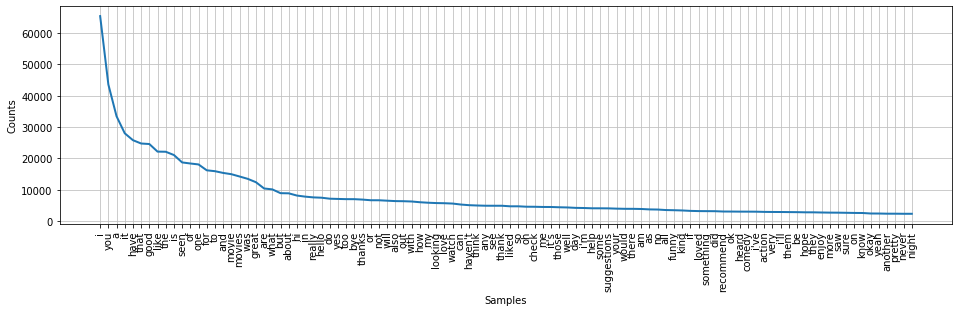

In [13]:
plt.figure(figsize=(16, 4))
word_freq.plot(100, cumulative=False)

## 2) movies_with_mentions.csv

In [14]:
# Data loading

df_mv = pd.read_csv('./data/redial_dataset/movies_with_mentions.csv')

In [15]:
# Basic stats

print('Num of movies: {:,}'.format(df_mv.size))
print('Num of mentioned: {:,}'.format(df_mv.nbMentions.sum()))

Num of movies: 20,772
Num of mentioned: 80,109


In [16]:
# Most mentioned movie

df_mv.sort_values(by=['nbMentions'], ascending=False).head(10)

,movieId,movieName,nbMentions
6778,204974,Black Panther (2018),1024
5828,187028,It (2017),896
445,83552,Jumanji (2017),731
2457,122604,Coco (2017),508
5705,184418,Get Out (2017),496
160,78340,Deadpool (2016),447
167,78418,The Avengers (2012),443
3395,140749,Moana (2016),415
2259,119144,Wonder Woman (2017),405
3359,140066,Bridesmaids (2011),398


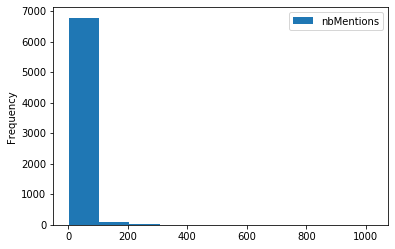

In [17]:
# histgram of nbMentions

df_mv.plot(y=['nbMentions'], kind='hist')

## End of file